# عاطفه محمدی

* project name : digikala comments sentiment analysis
* naive bayes classifier

## data loading and definitions

importing the libraries :

In [1]:
import pandas as pd
from hazm import Normalizer, word_tokenize, Stemmer, Lemmatizer, stopwords_list
import re # regular expression

loading the training dataset :

In [2]:
train_data = pd.read_csv('comment_train.csv')

checking the head of training dataset :

In [3]:
train_data.head(10)

,title,comment,recommend
0,زیبا اما کم دوام,با وجود سابقه خوبی که از برند ایرانی نهرین سرا...,not_recommended
1,بسیار عالی,بسیار عالی,recommended
2,سلام,من الان ۳ هفته هست استفاده میکنم\r\nبرای کسایی...,not_recommended
3,به درد نمیخورهههه,عمرش کمه تا یه هفته بیشتر نمیشه استفاده کرد یا...,not_recommended
4,کلمن آب,فکر کنین کلمن بخرین با ذوق. کلی پولشو بدین. به...,not_recommended
5,سه شخصیت لگو,کالا هایی که اورده شد از نظر شکل هیچ شباهتی به...,not_recommended
6,اصن موندگار نیس,نمیدونم چی بگم با اینهمه پول چرا جنس خوب نباشه...,not_recommended
7,قیمت بالا,خوب و تاثیر گذار اما با قیمت جدید سخته خریدش ه...,recommended
8,هدفون بی سیم,برد گوشی بسیار ضعیف است,not_recommended
9,جای دستمال کاغذی,بسیار زیبا و دارای کارایی مناسب,recommended


training dataset has 6000 rows with 3 columns and does not contain any null values :

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      6000 non-null   object
 1   comment    6000 non-null   object
 2   recommend  6000 non-null   object
dtypes: object(3)
memory usage: 140.8+ KB


loading the test dataset, it has the same columns as training dataset; with 800 non-null rows :

In [5]:
test_data = pd.read_csv('comment_test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      800 non-null    object
 1   comment    800 non-null    object
 2   recommend  800 non-null    object
dtypes: object(3)
memory usage: 18.9+ KB


here we make a set of Persian stop words, in addition to the stopwords_list which is built into the hazm library :

In [6]:
stop_words = '۰ ۱ ۲ ۳ ۴ ۵ ۶ ۷ ۸ ۹ ! !! " # ( ) * ، - . / ؟ ؛ : ٪ [ ] « » , ; ? $ % 0 1 2 3 4 5 6 7 8 9'.split()

In [7]:
stop_words.extend('یه و در به از که این است را با برای آن ان ای تا بر نیز هم ما یا اما ولی هر او آنها اگر همه بی چه چند اینکه حتی بعد شما تر ترین چون اکنون حالا هنوز چرا البته بلکه فقط وقتی مثل مانند آنچه آنکه بنابراین باید نباید لطفا پیش همین آره بله اره بلی چیز چیزی آیا کی تان شان یکدیگر همدیگر ام اش زیرا صفر یک دو سه چهار پنج شش شیش هفت هشت نه ده'.split())

In [8]:
stop_words.extend('رو تو این اگه من بود هست هس اون دارد تومن ریال صرفا کند کرد نکرده دلار واس ا ب پ ت ث ج چ ح خ د ذ ر ز ژ س ش ص ض ط ظ ع غ ف ق ک گ ل م ن و ه ی آ بیرون چن اینقد اونقد کنید خواهش غیره تقریبا نمیره شد نشد واقعا احتمالا فعلا حتما می نمی چیو ووو درباره راجب تومان همین همان همون دوم سوم جدا اومد لطفاً'.split())

In [9]:
stop_words = set(stop_words)

In [10]:
stop_words

{'!',
 '!!',
 '"',
 '#',
 '$',
 '%',
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '[',
 ']',
 '«',
 '»',
 '،',
 '؛',
 '؟',
 'آ',
 'آره',
 'آن',
 'آنها',
 'آنچه',
 'آنکه',
 'آیا',
 'ا',
 'احتمالا',
 'اره',
 'از',
 'است',
 'اش',
 'البته',
 'ام',
 'اما',
 'ان',
 'او',
 'اومد',
 'اون',
 'اونقد',
 'اکنون',
 'اگر',
 'اگه',
 'ای',
 'این',
 'اینقد',
 'اینکه',
 'ب',
 'با',
 'باید',
 'بر',
 'برای',
 'بعد',
 'بله',
 'بلکه',
 'بلی',
 'بنابراین',
 'به',
 'بود',
 'بی',
 'بیرون',
 'ت',
 'تا',
 'تان',
 'تر',
 'ترین',
 'تقریبا',
 'تو',
 'تومان',
 'تومن',
 'ث',
 'ج',
 'جدا',
 'ح',
 'حالا',
 'حتما',
 'حتی',
 'خ',
 'خواهش',
 'د',
 'دارد',
 'در',
 'درباره',
 'دلار',
 'ده',
 'دو',
 'دوم',
 'ذ',
 'ر',
 'را',
 'راجب',
 'رو',
 'ریال',
 'ز',
 'زیرا',
 'س',
 'سه',
 'سوم',
 'ش',
 'شان',
 'شد',
 'شش',
 'شما',
 'شیش',
 'ص',
 'صرفا',
 'صفر',
 'ض',
 'ط',
 'ظ',
 'ع',
 'غ',
 'غیره',
 'ف',
 'فعلا',
 'فقط',
 'ق',
 'ل',
 'لطفا',
 'لطفاً',
 'م',
 '

defining a function for removing emojies from comments' text :

In [11]:
def emoji_removing(text):
    emoj = re.compile("["
                      u"\U0001F600-\U0001F64F"  # emoticons
                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
                      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                      u"\U00002500-\U00002BEF"  # chinese char
                      u"\U00002702-\U000027B0"
                      u"\U00002702-\U000027B0"
                      u"\U000024C2-\U0001F251"
                      u"\U0001f926-\U0001f937"
                      u"\U00010000-\U0010ffff"
                      u"\u2640-\u2642"
                      u"\u2600-\u2B55"
                      u"\u200d"
                      u"\u23cf"
                      u"\u23e9"
                      u"\u231a"
                      u"\ufe0f"  # dingbats
                      u"\u3030"
                      "]+", re.UNICODE)
    text= re.sub(emoj, '', text)
    return text

defining a function for computing 4 metrics; accuracy, precision, recall and F1 :

In [12]:
def metrics(df):
    correct_detected = 0
    correct_detected_recom = 0
    total = df.shape[0]
    for row in range(total):
        if df.loc[row, 'recommend'] == df.loc[row, 'prediction']:
            correct_detected += 1
        if df.loc[row, 'recommend'] == df.loc[row, 'prediction'] and df.loc[row, 'prediction'] == 'recommended':
            correct_detected_recom += 1
    acc = correct_detected / total
    pre = correct_detected_recom / df['prediction'].value_counts()['recommended']
    recal = correct_detected_recom / df['recommend'].value_counts()['recommended']
    f1 = (2*pre*recal) / (pre+recal)
    return acc, pre, recal, f1

# a) using data preprocessing and additive smoothing

cell below is dedicated to cleaning the comments in train dataset. detailed explanation about it is in the attached report :

In [118]:
stmr = Stemmer()
nrmlzr = Normalizer()
bag_of_words_train = set()
corpus = []
for row in range(train_data.shape[0]):
    data = dict()
    for col in ['title', 'comment']:
        sent = train_data.loc[row, col]
        sent = emoji_removing(sent)
        sent = nrmlzr.normalize(sent)
        words = word_tokenize(sent)
        tmp = []
        for word in words:
            if word not in stopwords_list() and word not in stop_words:    # checking both lists
                tmp.append(word)
        for t in tmp:
            s = stmr.stem(t)
            bag_of_words_train.add(s)
            if s in data.keys():
                data[s] += 1
            else:
                data[s] = 1
    data['recommend'] = train_data.loc[row, 'recommend']
    corpus.append(data)   # making a list of dictionaries

so we make a dataframe on "corpus" dictionary. columns of this dataframe are the words in bag_of_words for train dataset. each row indicates a single comment from training dataset. the value in each cell shows the number of occurances of the word in that particular comment. the aim column (recommend) is also included.

In [119]:
train_df = pd.DataFrame(corpus)

Null values are substitued with 0 because it means the comment does not contain that word :

In [120]:
train_df = train_df.fillna(0)

In [121]:
train_df

,زیبا,دوا,سابقه,برند,ایران,نهرین,سراغ,دا,۱۵,روز,...,ماتریال,ولطیفه,بزرگتراز,ماچا,نمیدونسته,امپریال,ضدسرطان,اکسیدان,مونوه,کاربد
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0


seprating this dataframe based on "recommend" column, we make 2 dataframes; "recom_df" and "not_recom_df". then we calculate the sum of all columns and store them in a new row. in this way, we have a pandas Series which contains most important words in the recommended comments and their frequencies of occurance.

In [122]:
recom_df = train_df[train_df['recommend'] == 'recommended']
recom_df = recom_df.reset_index(drop=True)

In [123]:
recom_df

,زیبا,دوا,سابقه,برند,ایران,نهرین,سراغ,دا,۱۵,روز,...,ماتریال,ولطیفه,بزرگتراز,ماچا,نمیدونسته,امپریال,ضدسرطان,اکسیدان,مونوه,کاربد
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
recom_df.loc['pos_bow'] = recom_df.sum()

In [125]:
recom_df

,زیبا,دوا,سابقه,برند,ایران,نهرین,سراغ,دا,۱۵,روز,...,ماتریال,ولطیفه,بزرگتراز,ماچا,نمیدونسته,امپریال,ضدسرطان,اکسیدان,مونوه,کاربد
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [126]:
ser1 = recom_df.loc['pos_bow'].copy()
ser1.drop('recommend', inplace=True)

ser1 is that Series for recommended comments. we dropped the "recommend" index because it is not needed. then, we also delete indecies with zero value because those belong to not_recommended comments :

In [127]:
ser1 = ser1[ser1 != 0]
ser1

زیبا        318
دوا          29
سابقه         2
برند        106
ایران        60
           ... 
ماتریال       1
ولطیفه        1
بزرگتراز      1
مونوه         1
کاربد         1
Name: pos_bow, Length: 9099, dtype: object

In [128]:
pos_sum = ser1.sum()
pos_size = len(ser1)

doing the same for not recommended comments :

In [129]:
not_recom_df = train_df[train_df['recommend'] == 'not_recommended']
not_recom_df = not_recom_df.reset_index(drop=True)

In [130]:
not_recom_df.loc['neg_bow'] = not_recom_df.sum()

In [131]:
not_recom_df

,زیبا,دوا,سابقه,برند,ایران,نهرین,سراغ,دا,۱۵,روز,...,ماتریال,ولطیفه,بزرگتراز,ماچا,نمیدونسته,امپریال,ضدسرطان,اکسیدان,مونوه,کاربد
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0


In [132]:
ser2 = not_recom_df.loc['neg_bow'].copy()
ser2.drop('recommend', inplace=True)

ser2 is a pandas Series containing the most important words in not recommended comments and their frequencies of occurance :

In [133]:
ser2 = ser2[ser2 != 0]
ser2

زیبا         98
دوا          30
سابقه         3
برند         93
ایران        51
             ..
ماچا          3
نمیدونسته     1
امپریال       1
ضدسرطان       1
اکسیدان       1
Name: neg_bow, Length: 8263, dtype: object

In [134]:
neg_sum = ser2.sum()
neg_size = len(ser2)

cleaning the test dataset and making the same dataframe as we did for training dataset. also a list is created which contains the exact data as "test_df" rows. I did this because it is much easier to iterate through the words in this way :D

In [135]:
corpus = []
test_corpus = []
for row in range(test_data.shape[0]):
    data = list()
    d = dict()
    for col in ['title', 'comment']:
        sent = test_data.loc[row, col]
        sent = emoji_removing(sent)
        sent = nrmlzr.normalize(sent)
        words = word_tokenize(sent)
        tmp = []
        for word in words:
            if word not in stopwords_list() and word not in stop_words:
                tmp.append(word)
        for t in tmp:
            s = stmr.stem(t)
            data.append(s)
            if s in d.keys():
                d[s] += 1
            else:
                d[s] = 1
    d['recommend'] = test_data.loc[row, 'recommend']
    corpus.append(d)   # list of dictionaries for making dataframe
    test_corpus.append(data)   # list of lists for iterating through

In [136]:
test_df = pd.DataFrame(corpus)
test_df = test_df.fillna(0)
test_df

,ور,گود,تازه,خرید,کار,بکنه,میشه,کیف,قطعات,recommend,...,هستت,فاقد,اززش,تناسب,سورمه,تازع,کردم-سرع,عالیع-تس,بعدیو,هفتس
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,not_recommended,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,recommended,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


by iterating through that list (test_corpus), we are actually calculating P(x|1); meaning the probability of belonging of each comment in test dataframe to class #1 (recommended) :

In [137]:
for i in range(len(test_corpus)):
    p = 1
    for j in test_corpus[i]:
        if j in ser1.index:   # word is available in train dataset
            soorat1 = ser1[j] + 1
        else:    # word isn't in train dataset. so p(w)=0
            soorat1 = 0 + 1
        makhraj1 = pos_sum + pos_size + 1
        p *= (soorat1/makhraj1)
    test_df.loc[i, 'predict_for_recom'] = p * 0.5

probability of belonging to class #0 (not recommended) :

In [138]:
for i in range(len(test_corpus)):
    p = 1
    for j in test_corpus[i]:
        if j in ser2.index:    # word is available in train dataset
            soorat2 = ser2[j] + 1
        else:    # word isn't in train dataset. so p(w)=0
            soorat2 = 0 + 1
        makhraj2 = neg_sum + neg_size + 1
        p *= (soorat2/makhraj2)
    test_df.loc[i, 'predict_for_not_recom'] = p * 0.5

the prediction of naive bayes model would be whichever class that has higher probability :

In [139]:
for row in range(test_df.shape[0]):
    if test_df.loc[row, 'predict_for_recom'] > test_df.loc[row, 'predict_for_not_recom']:
        test_df.loc[row, 'prediction'] = 'recommended'
    else:
        test_df.loc[row, 'prediction'] = 'not_recommended'

In [140]:
test_df

,ور,گود,تازه,خرید,کار,بکنه,میشه,کیف,قطعات,recommend,...,تناسب,سورمه,تازع,کردم-سرع,عالیع-تس,بعدیو,هفتس,predict_for_recom,predict_for_not_recom,prediction
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.136964e-29,6.047963e-29,recommended
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.568925e-51,6.978473e-52,recommended
2,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.113719e-99,9.383091e-101,recommended
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.242550e-298,2.588571e-290,not_recommended
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.841639e-64,2.879343e-67,recommended
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.729034e-86,2.186007e-84,not_recommended
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.787225e-55,1.145102e-51,not_recommended
797,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,recommended,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7.858847e-31,2.208479e-33,recommended
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,recommended,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.052017e-38,1.393063e-39,recommended


results for section "a" :

In [141]:
a_result = test_df[['recommend', 'prediction']]
a_result

,recommend,prediction
0,recommended,recommended
1,not_recommended,recommended
2,recommended,recommended
3,not_recommended,not_recommended
4,recommended,recommended
...,...,...
795,not_recommended,not_recommended
796,not_recommended,not_recommended
797,recommended,recommended
798,recommended,recommended


In [142]:
a_accuracy, a_precision, a_recall, a_f1 = metrics(a_result)
print('accuracy for section a :', round(a_accuracy,3))
print('precision for section a :', round(a_precision, 3))
print('recall for section a :', round(a_recall, 3))
print('f1 for section a :', round(a_f1,3))

accuracy for section a : 0.907
precision for section a : 0.927
recall for section a : 0.885
f1 for section a : 0.905


### 9

پنج مورد از کامنت هایی که در این قسمت به اشتباه لیبلشان پیش بینی شده بود، در این جا چاپ شده اند. طولانی بودن متن کامنت و استفاده از کلمات دوپهلو از عوامل این موضوع می باشند.

In [143]:
numbers = []
i = 0
for j in range(800):
    if a_result.loc[j, 'recommend'] != a_result.loc[j, 'prediction']:
        i += 1
        numbers.append(j)
    if i==5:
        break

In [144]:
for r in numbers:
    print('title : ', test_data.loc[r, 'title'])
    print('comment : ', test_data.loc[r, 'comment'])
    print('---------------------------------')

title :  زیاد مناسب نیست رنگ پس میده یه وقتایی موقع نوشتن
comment :  با این قیمت گزینه های بهتری هم میشه گرفت.
روان مینویسه ولی زیاد مناسب نیست و رنگ پس میده یه وقتایی موقع نوشتن
---------------------------------
title :  نقد پس از خرید
comment :  سلام ، راحت شدم از کابل شارژ ، توصیه میشود به شدت . ارزان گوشی خود را به شارژ وایرلس مجهز کنید .
---------------------------------
title :  گزینه خوبیه
comment :  سلام ، گزینه خوبیه من یه mg2540  خریده بودم یعنی رسما منو روانی کرد ..
کارتریجش کنتور داشت بعد ۳۰۰ برگ نمیزد دیگه ! 
این که به دستم رسید حس  خلاص شدن از دست شارژ کارتریج و تعویض کارتریج کاملا حس کردم .
پرینتر خوبیه   کیفیت چاپش بسیاااااار فوق العاده هستش   کاغذ با کیفیت بخرید و پرینت بگیرید  قطعا متوجه منظورم میشید ! (کاغد معمولی A4 هم باید با کیفیت بخرید)
۳..۴ تا عکس اتلیه ای چاپ کردم چسبوندم رو تخته شاسی  با عکس اتلیه اصلی مو نزد !
خلاصه اینو پیشنهاد میکنم ولی بازم یه جمع بندی کنید
اگر مشکل مالی ندارید   g3400 یا g3410 بخرید  که وایرلس هم داره 
ولی برا من بودن و نبود وایفای فرق نم

# b) using only additive smoothing

In [38]:
train_data.head()

,title,comment,recommend
0,زیبا اما کم دوام,با وجود سابقه خوبی که از برند ایرانی نهرین سرا...,not_recommended
1,بسیار عالی,بسیار عالی,recommended
2,سلام,من الان ۳ هفته هست استفاده میکنم\r\nبرای کسایی...,not_recommended
3,به درد نمیخورهههه,عمرش کمه تا یه هفته بیشتر نمیشه استفاده کرد یا...,not_recommended
4,کلمن آب,فکر کنین کلمن بخرین با ذوق. کلی پولشو بدین. به...,not_recommended


In [39]:
test_data.head()

,title,comment,recommend
0,وری گود,تازه خریدم یه مدت کار بکنه مشخص میشه کیفیت قطعاتش,recommended
1,زیاد مناسب نیست رنگ پس میده یه وقتایی موقع نوشتن,با این قیمت گزینه های بهتری هم میشه گرفت.\r\nر...,not_recommended
2,پنکه گوشی,خیلی عالیه، فقط کاش از اون سمتش میشد به پاوربا...,recommended
3,دستگاه خیلی ضعیف,من این فیس براس چند روز یپش به دستم رسید و الا...,not_recommended
4,عالی و بیست,بنده یه هارد اکسترنال دارم که کابل فابریکش سال...,recommended


making bag of words for train data :

In [40]:
corpus = []
for row in range(train_data.shape[0]):
    data = dict()
    for col in ['title', 'comment']:
        sent = train_data.loc[row, col]
        words = word_tokenize(sent)
        for w in words:
            if w in data.keys():
                data[w] += 1
            else:
                data[w] = 1
    data['recommend'] = train_data.loc[row, 'recommend']
    corpus.append(data)   # making a list of dictionaries

In [41]:
train_df = pd.DataFrame(corpus)
train_df = train_df.fillna(0)
train_df.head()

,زیبا,اما,کم,دوام,با,وجود,سابقه,خوبی,که,از,...,نیسش,نمیدونسته,امپریال,بگ,ماچای,ضدسرطانی,انتی,اکسیدانی,مونوهم,کاربدی
0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


splitting "train_df" into "recom_df" (ser1) and "not_recom_df" (ser2) :

In [42]:
recom_df = train_df[train_df['recommend'] == 'recommended']
recom_df = recom_df.reset_index(drop=True)
recom_df

,زیبا,اما,کم,دوام,با,وجود,سابقه,خوبی,که,از,...,نیسش,نمیدونسته,امپریال,بگ,ماچای,ضدسرطانی,انتی,اکسیدانی,مونوهم,کاربدی
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
recom_df.loc['pos_bow'] = recom_df.sum()
recom_df.tail()

,زیبا,اما,کم,دوام,با,وجود,سابقه,خوبی,که,از,...,نیسش,نمیدونسته,امپریال,بگ,ماچای,ضدسرطانی,انتی,اکسیدانی,مونوهم,کاربدی
2996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
pos_bow,221.0,332.0,179.0,29.0,1575.0,59.0,2.0,415.0,2493.0,2384.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [44]:
ser1 = recom_df.loc['pos_bow'].copy()
ser1.drop('recommend', inplace=True)
ser1 = ser1[ser1 != 0]
ser1_sum = ser1.sum()
ser1_size = len(ser1)
ser1

زیبا         221
اما          332
کم           179
دوام          29
با          1575
            ... 
ولطیفه         1
بزرگتراز       1
کاربریش        1
مونوهم         1
کاربدی         1
Name: pos_bow, Length: 12080, dtype: object

In [45]:
not_recom_df = train_df[train_df['recommend'] == 'not_recommended']
not_recom_df = not_recom_df.reset_index(drop=True)
not_recom_df.loc['neg_bow'] = not_recom_df.sum()
not_recom_df.tail()

,زیبا,اما,کم,دوام,با,وجود,سابقه,خوبی,که,از,...,نیسش,نمیدونسته,امپریال,بگ,ماچای,ضدسرطانی,انتی,اکسیدانی,مونوهم,کاربدی
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
neg_bow,51.0,347.0,176.0,30.0,1326.0,85.0,3.0,173.0,2186.0,2221.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [46]:
ser2 = not_recom_df.loc['neg_bow'].copy()
ser2.drop('recommend', inplace=True)
ser2 = ser2[ser2 != 0]
ser2_sum = ser2.sum()
ser2_size = len(ser2)
ser2

زیبا          51
اما          347
کم           176
دوام          30
با          1326
            ... 
بگ             1
ماچای          1
ضدسرطانی       1
انتی           1
اکسیدانی       1
Name: neg_bow, Length: 11049, dtype: object

making bag of words for test data :

In [49]:
test_data

,title,comment,recommend
0,وری گود,تازه خریدم یه مدت کار بکنه مشخص میشه کیفیت قطعاتش,recommended
1,زیاد مناسب نیست رنگ پس میده یه وقتایی موقع نوشتن,با این قیمت گزینه های بهتری هم میشه گرفت.\r\nر...,not_recommended
2,پنکه گوشی,خیلی عالیه، فقط کاش از اون سمتش میشد به پاوربا...,recommended
3,دستگاه خیلی ضعیف,من این فیس براس چند روز یپش به دستم رسید و الا...,not_recommended
4,عالی و بیست,بنده یه هارد اکسترنال دارم که کابل فابریکش سال...,recommended
...,...,...,...
795,بسیار کوچیک,طراحیش قشنگه ولی داخل عکس خیلی بزرگتر ب چشم م...,not_recommended
796,لامپ چینی,این لامپ چینی هستتش کیفیت پایین . نور کم و فاق...,not_recommended
797,خوب بود,در کل از این خریدم راضی هستم و به تناسب قیمتش ...,recommended
798,کیفیت خوبی داره,تازع نصبش کردم-سرعت انتقال و نصب بازی روش عالی...,recommended


In [50]:
corp = []
test_corpus = []
for row in range(test_data.shape[0]):
    data = list()
    d = dict()
    for col in ['title', 'comment']:
        sent = test_data.loc[row, col]
        words = word_tokenize(sent)
        for t in words:
            data.append(t)
            if t in d.keys():
                d[s] += 1
            else:
                d[s] = 1
    d['recommend'] = test_data.loc[row, 'recommend']
    corp.append(d)   # list of dictionaries for making dataframe
    test_corpus.append(data)   # list of lists for iterating through

In [51]:
test_df = pd.DataFrame(corp)
test_df = test_df.fillna(0)
test_df

,نمیکنه,recommend
0,1,recommended
1,1,not_recommended
2,1,recommended
3,1,not_recommended
4,1,recommended
...,...,...
795,1,not_recommended
796,1,not_recommended
797,1,recommended
798,1,recommended


making predictions on test dataset using naive bayes :

In [52]:
for i in range(len(test_corpus)):
    p = 1
    for j in test_corpus[i]:
        if j in ser1.index:   # word is available in train dataset
            soorat1 = ser1[j] + 1
        else:    # word isn't in train dataset. so p(w)=0
            soorat1 = 0 + 1
        makhraj1 = ser1_sum + ser1_size + 1
        p *= (soorat1/makhraj1)
    test_df.loc[i, 'predict_for_recom'] = p * 0.5

In [53]:
for i in range(len(test_corpus)):
    p = 1
    for j in test_corpus[i]:
        if j in ser2.index:    # word is available in train dataset
            soorat2 = ser2[j] + 1
        else:    # word isn't in train dataset. so p(w)=0
            soorat2 = 0 + 1
        makhraj2 = ser2_sum + ser2_size + 1
        p *= (soorat2/makhraj2)
    test_df.loc[i, 'predict_for_not_recom'] = p * 0.5

In [54]:
for row in range(test_df.shape[0]):
    if test_df.loc[row, 'predict_for_recom'] > test_df.loc[row, 'predict_for_not_recom']:
        test_df.loc[row, 'prediction'] = 'recommended'
    else:
        test_df.loc[row, 'prediction'] = 'not_recommended'

In [55]:
test_df

,نمیکنه,recommend,predict_for_recom,predict_for_not_recom,prediction
0,1,recommended,4.361424e-42,2.174604e-42,recommended
1,1,not_recommended,4.735276e-105,1.676872e-104,not_recommended
2,1,recommended,1.360730e-173,8.822642e-175,recommended
3,1,not_recommended,0.000000e+00,0.000000e+00,not_recommended
4,1,recommended,4.435245e-109,9.112559e-115,recommended
...,...,...,...,...,...
795,1,not_recommended,2.201584e-126,5.388053e-124,not_recommended
796,1,not_recommended,6.824127e-74,2.489066e-70,not_recommended
797,1,recommended,7.008047e-72,5.476972e-74,recommended
798,1,recommended,2.183774e-52,1.450982e-54,recommended


In [56]:
b_result = test_df[['recommend', 'prediction']]
b_result

,recommend,prediction
0,recommended,recommended
1,not_recommended,not_recommended
2,recommended,recommended
3,not_recommended,not_recommended
4,recommended,recommended
...,...,...
795,not_recommended,not_recommended
796,not_recommended,not_recommended
797,recommended,recommended
798,recommended,recommended


results for section "b" :

In [57]:
b_accuracy, b_precision, b_recall, b_f1 = metrics(b_result)
print('accuracy for section b :', round(b_accuracy,3))
print('precision for section b :', round(b_precision, 3))
print('recall for section b :', round(b_recall, 3))
print('f1 for section b :', round(b_f1,3))

accuracy for section b : 0.896
precision for section b : 0.93
recall for section b : 0.858
f1 for section b : 0.892


# c) using only data preprocessing

in section "c" we will only be using data preprocessing. therefore we will seprately try using Stemming & Lemmatizing here and compare the results.

In [60]:
def train_data_cleaner(df_data, stopwords, func):
    nrmlzr = Normalizer()
    corpus = []
    
    for row in range(df_data.shape[0]):
        data = dict()
        for col in ['title', 'comment']:
            sent = df_data.loc[row, col]
            sent = emoji_removing(sent)
            sent = nrmlzr.normalize(sent)
            words = word_tokenize(sent)
            tmp = []
            for word in words:
                if word not in stopwords_list() and word not in stopwords:
                    tmp.append(word)
            for t in tmp:
                s = func(t)    # using Stemmer or Lemmatizer
                if s in data.keys():
                    data[s] += 1
                else:
                    data[s] = 1
        data['recommend'] = df_data.loc[row, 'recommend']
        corpus.append(data)   # making a list of dictionaries
    
    train_df = pd.DataFrame(corpus)
    train_df = train_df.fillna(0)
    return train_df

calling train_data_cleaner with both Stemmer and Lemmatizer :

In [62]:
stmr = Stemmer()
lmtzr = Lemmatizer()
train_df_stem = train_data_cleaner(train_data, stop_words, stmr.stem)
train_df_lemm = train_data_cleaner(train_data, stop_words, lmtzr.lemmatize)

making ser1_stem and ser2_stem :

In [63]:
recom_stem = train_df_stem[train_df_stem['recommend'] == 'recommended']
recom_stem = recom_stem.reset_index(drop=True)
recom_stem.loc['pos_bow'] = recom_stem.sum()
recom_stem

,زیبا,دوا,سابقه,برند,ایران,نهرین,سراغ,دا,۱۵,روز,...,ماتریال,ولطیفه,بزرگتراز,ماچا,نمیدونسته,امپریال,ضدسرطان,اکسیدان,مونوه,کاربد
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [64]:
ser1_stem = recom_stem.loc['pos_bow'].copy()
ser1_stem.drop('recommend', inplace=True)
ser1_stem = ser1_stem[ser1_stem != 0]
ser1_stem_sum = ser1_stem.sum()
#ser1_stem_size = len(ser1_stem)
ser1_stem

زیبا        318
دوا          29
سابقه         2
برند        106
ایران        60
           ... 
ماتریال       1
ولطیفه        1
بزرگتراز      1
مونوه         1
کاربد         1
Name: pos_bow, Length: 9099, dtype: object

In [65]:
not_recom_stem = train_df_stem[train_df_stem['recommend'] == 'not_recommended']
not_recom_stem = not_recom_stem.reset_index(drop=True)
not_recom_stem.loc['neg_bow'] = not_recom_stem.sum()
not_recom_stem

,زیبا,دوا,سابقه,برند,ایران,نهرین,سراغ,دا,۱۵,روز,...,ماتریال,ولطیفه,بزرگتراز,ماچا,نمیدونسته,امپریال,ضدسرطان,اکسیدان,مونوه,کاربد
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0


In [66]:
ser2_stem = not_recom_stem.loc['neg_bow'].copy()
ser2_stem.drop('recommend', inplace=True)
ser2_stem = ser2_stem[ser2_stem != 0]
ser2_stem_sum = ser2_stem.sum()
#ser2_stem_size = len(ser2_stem)
ser2_stem

زیبا         98
دوا          30
سابقه         3
برند         93
ایران        51
             ..
ماچا          3
نمیدونسته     1
امپریال       1
ضدسرطان       1
اکسیدان       1
Name: neg_bow, Length: 8263, dtype: object

In [67]:
def test_data_cleaner(df_data, stopwords, func):
    corpus = []
    test_corpus = []
    for row in range(df_data.shape[0]):
        data = list()
        d = dict()
        for col in ['title', 'comment']:
            sent = df_data.loc[row, col]
            sent = emoji_removing(sent)
            sent = nrmlzr.normalize(sent)
            words = word_tokenize(sent)
            tmp = []
            for word in words:
                if word not in stopwords_list() and word not in stopwords:
                    tmp.append(word)
            for t in tmp:
                s = func(t)    # Stemmer or Lemmatizer
                data.append(s)
                if s in d.keys():
                    d[s] += 1
                else:
                    d[s] = 1
        d['recommend'] = df_data.loc[row, 'recommend']
        corpus.append(d)   # list of dictionaries for making dataframe
        test_corpus.append(data)   # list of lists for iterating through
    
    test_df = pd.DataFrame(corpus)
    test_df = test_df.fillna(0)
    return test_df, test_corpus

cleaning test dataset using Stemmer and Lemmatizer :

In [68]:
test_df_stem, test_corpus_stem = test_data_cleaner(test_data, stop_words, stmr.stem)
test_df_lemm, test_corpus_lemm = test_data_cleaner(test_data, stop_words, lmtzr.lemmatize)

In [69]:
test_df_stem

,ور,گود,تازه,خرید,کار,بکنه,میشه,کیف,قطعات,recommend,...,هستت,فاقد,اززش,تناسب,سورمه,تازع,کردم-سرع,عالیع-تس,بعدیو,هفتس
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,not_recommended,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,recommended,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [70]:
test_df_lemm

,وری,گود,تازه,خرید#خر,کار,بکنه,میشه,کیفیت,قطعات,recommend,...,هستتش,فاقد,اززشش,تناسب,سورمه‌ای,تازع,کردم-سرعت,عالیع-تست,بعدیو,هفتست
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,not_recommended,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,recommended,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


calculating probabilities of being recommended for "test_corpus_stem" by using "ser1_stem" : <br>
p.s : we aren't taking advantage of additive smoothing here, so there might be zero probabilities

In [71]:
for i in range(len(test_corpus_stem)):
    p = 1
    for j in test_corpus_stem[i]:
        if j in ser1_stem.index:   # word is available in train dataset
            soorat1 = ser1_stem[j]
        else:    # word isn't in train dataset. so p(w)=0
            soorat1 = 0
        makhraj1 = ser1_stem_sum
        p *= (soorat1/makhraj1)
    test_df_stem.loc[i, 'predict_for_recom_w_stem'] = p * 0.5

calculating probabilities of not being recommended for "test_corpus_stem" by using "ser2_stem" :

In [72]:
for i in range(len(test_corpus_stem)):
    p = 1
    for j in test_corpus_stem[i]:
        if j in ser2_stem.index:    # word is available in train dataset
            soorat2 = ser2_stem[j]
        else:    # word isn't in train dataset. so p(w)=0
            soorat2 = 0
        makhraj2 = ser2_stem_sum
        p *= (soorat2/makhraj2)
    test_df_stem.loc[i, 'predict_for_not_recom_w_stem'] = p * 0.5

making predictions (only used Stemming) :

In [73]:
for row in range(test_df_stem.shape[0]):
    if test_df_stem.loc[row, 'predict_for_recom_w_stem'] > test_df_stem.loc[row, 'predict_for_not_recom_w_stem']:
        test_df_stem.loc[row, 'prediction_w_stem'] = 'recommended'
    else:
        test_df_stem.loc[row, 'prediction_w_stem'] = 'not_recommended'

In [74]:
test_df_stem

,ور,گود,تازه,خرید,کار,بکنه,میشه,کیف,قطعات,recommend,...,تناسب,سورمه,تازع,کردم-سرع,عالیع-تس,بعدیو,هفتس,predict_for_recom_w_stem,predict_for_not_recom_w_stem,prediction_w_stem
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.971719e-29,4.559449e-29,recommended
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.544745e-51,1.386302e-51,recommended
2,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.459031e-98,0.000000e+00,recommended
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,3.410084e-288,not_recommended
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.007117e-63,8.192133e-67,recommended
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,2.646578e-85,not_recommended
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.873421e-51,not_recommended
797,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,recommended,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,9.302923e-31,2.204807e-33,recommended
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,recommended,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,9.151930e-39,0.000000e+00,recommended


result dataframe for section "c" using Stemming only :

In [75]:
c_result_w_stem = test_df_stem[['recommend', 'prediction_w_stem']]

calculating "ser1" and "ser2" for Lemmatizing :

In [76]:
recom_lemm = train_df_lemm[train_df_lemm['recommend'] == 'recommended']
recom_lemm = recom_lemm.reset_index(drop=True)
recom_lemm.loc['pos_bow'] = recom_lemm.sum()
recom_lemm

,زیبا,دوام,سابقه,برد#بر,ایران,نهرین,سراغ,داشت#دار,۱۵,روز,...,نیسش,نمیدونسته,امپریال,بگ,ماچای,ضدسرطانی,انتی,اکسیدانی,مونوهم,کاربدی
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [77]:
ser1_lemm = recom_lemm.loc['pos_bow'].copy()
ser1_lemm.drop('recommend', inplace=True)
ser1_lemm = ser1_lemm[ser1_lemm != 0]
ser1_lemm_sum = ser1_lemm.sum()
ser1_lemm

زیبا        244
دوام         34
سابقه         2
برد#بر      114
ایران        79
           ... 
ماتریال       1
ولطیفه        1
بزرگتراز      1
مونوهم        1
کاربدی        1
Name: pos_bow, Length: 9573, dtype: object

In [78]:
not_recom_lemm = train_df_lemm[train_df_lemm['recommend'] == 'not_recommended']
not_recom_lemm = not_recom_lemm.reset_index(drop=True)
not_recom_lemm.loc['neg_bow'] = not_recom_lemm.sum()
not_recom_lemm

,زیبا,دوام,سابقه,برد#بر,ایران,نهرین,سراغ,داشت#دار,۱۵,روز,...,نیسش,نمیدونسته,امپریال,بگ,ماچای,ضدسرطانی,انتی,اکسیدانی,مونوهم,کاربدی
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [79]:
ser2_lemm = not_recom_lemm.loc['neg_bow'].copy()
ser2_lemm.drop('recommend', inplace=True)
ser2_lemm = ser2_lemm[ser2_lemm != 0]
ser2_lemm_sum = ser2_lemm.sum()
ser2_lemm

زیبا        64
دوام        32
سابقه        3
برد#بر      97
ایران       66
            ..
بگ           1
ماچای        1
ضدسرطانی     1
انتی         1
اکسیدانی     1
Name: neg_bow, Length: 8626, dtype: object

calculating probabilities of being recommended for "test_corpus_lemm" by using "ser1_lemm" :

In [80]:
for i in range(len(test_corpus_lemm)):
    p = 1
    for j in test_corpus_lemm[i]:
        if j in ser1_lemm.index:   # word is available in train dataset
            soorat1 = ser1_lemm[j]
        else:    # word isn't in train dataset. so p(w)=0
            soorat1 = 0
        makhraj1 = ser1_lemm_sum
        p *= (soorat1/makhraj1)
    test_df_lemm.loc[i, 'predict_for_recom_w_lemm'] = p * 0.5

calculating probabilities of not being recommended for "test_corpus_lemm" by using "ser2_lemm" :

In [81]:
for i in range(len(test_corpus_lemm)):
    p = 1
    for j in test_corpus_lemm[i]:
        if j in ser2_lemm.index:    # word is available in train dataset
            soorat2 = ser2_lemm[j]
        else:    # word isn't in train dataset. so p(w)=0
            soorat2 = 0
        makhraj2 = ser2_lemm_sum
        p *= (soorat2/makhraj2)
    test_df_lemm.loc[i, 'predict_for_not_recom_w_lemm'] = p * 0.5

making predictions (used only lemmatizing) :

In [82]:
for row in range(test_df_lemm.shape[0]):
    if test_df_lemm.loc[row, 'predict_for_recom_w_lemm'] > test_df_lemm.loc[row, 'predict_for_not_recom_w_lemm']:
        test_df_lemm.loc[row, 'prediction_w_lemm'] = 'recommended'
    else:
        test_df_lemm.loc[row, 'prediction_w_lemm'] = 'not_recommended'

In [84]:
test_df_lemm

,وری,گود,تازه,خرید#خر,کار,بکنه,میشه,کیفیت,قطعات,recommend,...,تناسب,سورمه‌ای,تازع,کردم-سرعت,عالیع-تست,بعدیو,هفتست,predict_for_recom_w_lemm,predict_for_not_recom_w_lemm,prediction_w_lemm
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.373197e-29,0.000000e+00,recommended
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,4.667629e-53,not_recommended
2,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.301244e-97,0.000000e+00,recommended
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.748480e-292,not_recommended
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.127223e-64,9.150267e-68,recommended
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,4.417320e-85,not_recommended
796,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,not_recommended,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.611307e-50,not_recommended
797,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,recommended,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.254048e-30,2.823040e-32,recommended
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,recommended,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,6.697416e-39,0.000000e+00,recommended


result dataframe for section "c" using Lemmatizing only :

In [85]:
c_result_w_lemm = test_df_lemm[['recommend', 'prediction_w_lemm']]

results for both approaches :

In [87]:
def metrics_1(df):
    correct_detected = 0
    correct_detected_recom = 0
    total = df.shape[0]
    for row in range(total):
        if df.loc[row, 'recommend'] == df.loc[row, 'prediction_w_stem']:
            correct_detected += 1
        if df.loc[row, 'recommend'] == df.loc[row, 'prediction_w_stem'] and df.loc[row, 'prediction_w_stem'] == 'recommended':
            correct_detected_recom += 1
    acc = correct_detected / total
    pre = correct_detected_recom / df['prediction_w_stem'].value_counts()['recommended']
    recal = correct_detected_recom / df['recommend'].value_counts()['recommended']
    f1 = (2*pre*recal) / (pre+recal)
    return acc, pre, recal, f1

In [88]:
def metrics_2(df):
    correct_detected = 0
    correct_detected_recom = 0
    total = df.shape[0]
    for row in range(total):
        if df.loc[row, 'recommend'] == df.loc[row, 'prediction_w_lemm']:
            correct_detected += 1
        if df.loc[row, 'recommend'] == df.loc[row, 'prediction_w_lemm'] and df.loc[row, 'prediction_w_lemm'] == 'recommended':
            correct_detected_recom += 1
    acc = correct_detected / total
    pre = correct_detected_recom / df['prediction_w_lemm'].value_counts()['recommended']
    recal = correct_detected_recom / df['recommend'].value_counts()['recommended']
    f1 = (2*pre*recal) / (pre+recal)
    return acc, pre, recal, f1

In [89]:
c_stem_accuracy, c_stem_precision, c_stem_recall, c_stem_f1 = metrics_1(c_result_w_stem)
print('accuracy for section c using stemming :', round(c_stem_accuracy,3))
print('precision for section c using stemming :', round(c_stem_precision, 3))
print('recall for section c using stemming :', round(c_stem_recall, 3))
print('f1 for section c using stemming :', round(c_stem_f1,3))

accuracy for section c using stemming : 0.859
precision for section c using stemming : 0.931
recall for section c using stemming : 0.775
f1 for section c using stemming : 0.846


In [90]:
c_lemm_accuracy, c_lemm_precision, c_lemm_recall, c_lemm_f1 = metrics_2(c_result_w_lemm)
print('accuracy for section c using lemmatizing :', round(c_lemm_accuracy,3))
print('precision for section c using lemmatizing :', round(c_lemm_precision, 3))
print('recall for section c using lemmatizing :', round(c_lemm_recall, 3))
print('f1 for section c using lemmatizing :', round(c_lemm_f1,3))

accuracy for section c using lemmatizing : 0.87
precision for section c using lemmatizing : 0.948
recall for section c using lemmatizing : 0.782
f1 for section c using lemmatizing : 0.858


# d) using neither data preprocessing nor additive smoothing

In [91]:
d_corpus = []
for row in range(train_data.shape[0]):
    data = dict()
    for col in ['title', 'comment']:
        sent = train_data.loc[row, col]
        words = word_tokenize(sent)
        for w in words:
            if w in data.keys():
                data[w] += 1
            else:
                data[w] = 1
    data['recommend'] = train_data.loc[row, 'recommend']
    d_corpus.append(data)   # making a list of dictionaries

In [92]:
train_df = pd.DataFrame(d_corpus)
train_df = train_df.fillna(0)
train_df.head()

,زیبا,اما,کم,دوام,با,وجود,سابقه,خوبی,که,از,...,نیسش,نمیدونسته,امپریال,بگ,ماچای,ضدسرطانی,انتی,اکسیدانی,مونوهم,کاربدی
0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
recom_df = train_df[train_df['recommend'] == 'recommended']
recom_df = recom_df.reset_index(drop=True)
recom_df.loc['pos_bow'] = recom_df.sum()
recom_df.tail()

,زیبا,اما,کم,دوام,با,وجود,سابقه,خوبی,که,از,...,نیسش,نمیدونسته,امپریال,بگ,ماچای,ضدسرطانی,انتی,اکسیدانی,مونوهم,کاربدی
2996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
pos_bow,221.0,332.0,179.0,29.0,1575.0,59.0,2.0,415.0,2493.0,2384.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [94]:
ser1 = recom_df.loc['pos_bow'].copy()
ser1.drop('recommend', inplace=True)
ser1 = ser1[ser1 != 0]
ser1_sum = ser1.sum()
ser1

زیبا         221
اما          332
کم           179
دوام          29
با          1575
            ... 
ولطیفه         1
بزرگتراز       1
کاربریش        1
مونوهم         1
کاربدی         1
Name: pos_bow, Length: 12080, dtype: object

In [95]:
not_recom_df = train_df[train_df['recommend'] == 'not_recommended']
not_recom_df = not_recom_df.reset_index(drop=True)
not_recom_df.loc['neg_bow'] = not_recom_df.sum()
not_recom_df.tail()

,زیبا,اما,کم,دوام,با,وجود,سابقه,خوبی,که,از,...,نیسش,نمیدونسته,امپریال,بگ,ماچای,ضدسرطانی,انتی,اکسیدانی,مونوهم,کاربدی
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
neg_bow,51.0,347.0,176.0,30.0,1326.0,85.0,3.0,173.0,2186.0,2221.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [96]:
ser2 = not_recom_df.loc['neg_bow'].copy()
ser2.drop('recommend', inplace=True)
ser2 = ser2[ser2 != 0]
ser2_sum = ser2.sum()
ser2

زیبا          51
اما          347
کم           176
دوام          30
با          1326
            ... 
بگ             1
ماچای          1
ضدسرطانی       1
انتی           1
اکسیدانی       1
Name: neg_bow, Length: 11049, dtype: object

In [97]:
d_corp = []
test_corpus = []
for row in range(test_data.shape[0]):
    data = list()
    d = dict()
    for col in ['title', 'comment']:
        sent = test_data.loc[row, col]
        words = word_tokenize(sent)
        for t in words:
            data.append(t)
            if t in d.keys():
                d[s] += 1
            else:
                d[s] = 1
    d['recommend'] = test_data.loc[row, 'recommend']
    d_corp.append(d)   # list of dictionaries for making dataframe
    test_corpus.append(data)   # list of lists for iterating through

In [98]:
test_df = pd.DataFrame(d_corp)
test_df = test_df.fillna(0)
test_df

,نمیکنه,recommend
0,1,recommended
1,1,not_recommended
2,1,recommended
3,1,not_recommended
4,1,recommended
...,...,...
795,1,not_recommended
796,1,not_recommended
797,1,recommended
798,1,recommended


In [99]:
for i in range(len(test_corpus)):
    p = 1
    for j in test_corpus[i]:
        if j in ser1.index:   # word is available in train dataset
            soorat1 = ser1[j]
        else:    # word isn't in train dataset. so p(w)=0
            soorat1 = 0
        makhraj1 = ser1_sum
        p *= (soorat1/makhraj1)
    test_df.loc[i, 'predict_for_recom'] = p * 0.5

In [100]:
for i in range(len(test_corpus)):
    p = 1
    for j in test_corpus[i]:
        if j in ser2.index:    # word is available in train dataset
            soorat2 = ser2[j]
        else:    # word isn't in train dataset. so p(w)=0
            soorat2 = 0
        makhraj2 = ser2_sum
        p *= (soorat2/makhraj2)
    test_df.loc[i, 'predict_for_not_recom'] = p * 0.5

In [101]:
for row in range(test_df.shape[0]):
    if test_df.loc[row, 'predict_for_recom'] > test_df.loc[row, 'predict_for_not_recom']:
        test_df.loc[row, 'prediction'] = 'recommended'
    else:
        test_df.loc[row, 'prediction'] = 'not_recommended'

In [102]:
test_df

,نمیکنه,recommend,predict_for_recom,predict_for_not_recom,prediction
0,1,recommended,3.334037e-42,0.000000e+00,recommended
1,1,not_recommended,0.000000e+00,5.096293e-104,not_recommended
2,1,recommended,9.947909e-173,0.000000e+00,recommended
3,1,not_recommended,0.000000e+00,0.000000e+00,not_recommended
4,1,recommended,3.680811e-108,0.000000e+00,recommended
...,...,...,...,...,...
795,1,not_recommended,0.000000e+00,8.849724e-125,not_recommended
796,1,not_recommended,0.000000e+00,4.164739e-70,not_recommended
797,1,recommended,2.361728e-71,1.670612e-73,recommended
798,1,recommended,4.317972e-53,0.000000e+00,recommended


In [103]:
d_result = test_df[['recommend', 'prediction']]
d_result

,recommend,prediction
0,recommended,recommended
1,not_recommended,not_recommended
2,recommended,recommended
3,not_recommended,not_recommended
4,recommended,recommended
...,...,...
795,not_recommended,not_recommended
796,not_recommended,not_recommended
797,recommended,recommended
798,recommended,recommended


In [104]:
d_accuracy, d_precision, d_recall, d_f1 = metrics(d_result)
print('accuracy for section d :', round(d_accuracy,3))
print('precision for section d :', round(d_precision, 3))
print('recall for section d :', round(d_recall, 3))
print('f1 for section d :', round(d_f1,3))

accuracy for section d : 0.845
precision for section d : 0.954
recall for section d : 0.725
f1 for section d : 0.824


## comparison

let's compare results from all the 5 aproaches we took :

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
x = ['accuracy', 'precision', 'recall', 'F1']
y1 = [a_accuracy*100, a_precision*100, a_recall*100, a_f1*100]
y2 = [b_accuracy*100, b_precision*100, b_recall*100, b_f1*100]
y3_stem = [c_stem_accuracy*100, c_stem_precision*100, c_stem_recall*100, c_stem_f1*100]
y3_lemm = [c_lemm_accuracy*100, c_lemm_precision*100, c_lemm_recall*100, c_lemm_f1*100]
y4 = [d_accuracy*100, d_precision*100, d_recall*100, d_f1*100]

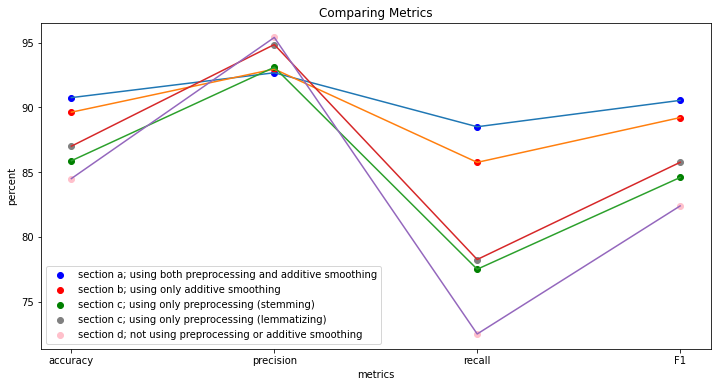

In [117]:
fig, axes = plt.subplots(1,1, figsize=(12,6))
plt.scatter(x, y1, c='b', label='section a; using both preprocessing and additive smoothing')
plt.plot(x,y1)
plt.scatter(x, y2, c='r', label='section b; using only additive smoothing')
plt.plot(x,y2)
plt.scatter(x, y3_stem, c='g', label='section c; using only preprocessing (stemming)')
plt.plot(x,y3_stem)
plt.scatter(x, y3_lemm, c='gray', label='section c; using only preprocessing (lemmatizing)')
plt.plot(x,y3_lemm)
plt.scatter(x, y4, c='pink', label='section d; not using preprocessing or additive smoothing')
plt.plot(x,y4)

plt.title('Comparing Metrics')
plt.xlabel('metrics')
plt.ylabel('percent')
axes.legend(loc='best')